# Programa Ingenias+ Data Science




## Analisis Exploratorio de un Dataset

Esta notebook les permitiria ejercitar los conceptos de Pandas 🐼  y Análisis exploratorio de datos 📊 que aprendimos hasta ahora. Vamos a trabajar con un dataset que contiene datos relativos a [clientes de un centro comercial](https://www.kaggle.com/akram24/mall-customers). En el Drive esta descargado el archivo. Si tenes inconvenientes o  ese archivo no funciona podes descargarlo directamente de la página web.

### 🔬 Comenzando el proyecto 🎉

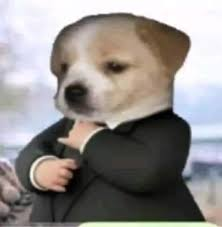

Es tu primer dia como Data Scientist. Tu primer proyecto consiste en hacer un análisis de datos sobre **clientes de un centro comercial** para luego hacer una **predicción de ventas** o un analisis de cluster. Antes que nada, debes inspeccionar y visualizar tu dataset para saber con que datos estas trabajando.

Como mencionamos durante la clase, una de las primeras cosas que debe realizar un Data Scientist al iniciar un nuevo proyecto es conocer el dataset con el cual va a trabajar. Este paso se conoce como _"Analisis exploratorio de los datos"_.

Además de obtener que tipo de datos contiene el dataset, estadistica descriptiva, detectar problemas como valores faltantes, establecer que tipo de relación existe entre las distintas variables, también debemos visualizar los datos. Este análisis nos permitira hacernos preguntas que puedan ser contestadas con el dataset como así plantear estrategias para poder resolver problemas presentes en él.

#### 1. IMPORTA LAS LIBRERIAS NECESARIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# IPython es una herramienta que mejora la experiencia de usar Python -  extensión de la consola de Python
# (autocompletado, historia de comandos - ayuda ? ??)
%matplotlib inline # util para algunos entornos - conocido como comándo mágico
# otros: %timeit - %%timeit - mide el tiempo de ejecución del código linea/celda

UsageError: unrecognized arguments: # util para algunos entornos - conocido como comándo mágico


In [ ]:
# Para el tiempo de una sola línea
%timeit np.sum(np.arange(1000))


In [ ]:
# Ejemplo de %%timeit con una celda completa
%%timeit
a = np.random.rand(1000, 1000)
b = np.random.rand(1000, 1000)
c = np.dot(a, b)
# 103 ms: tiempo promedio que tomó ejecutar una iteración del código medido (por cada loop
# ± 5.18 ms: ds - variabilidad
# repetición y fiabilidad

##### ¿Para qué %%timeit?
- Optimizar nuestro código - encontrar secciones a optimizar
- Comparar implementaciones
- Mejorar velocidades
- Uso de recursos

**Ejemplos prácticos:**
Al trabajar con big data, al entrenar algoritmos, aplicaciones en tiempo real, etc.

#### 2. CARGAR LOS DATOS

**_Lee los datos que se encuentran en el archivo `clientes_mall.csv`. Guardalos en un DataFrame._**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta_del_archivo = '/content/drive/My Drive/JUMP/Propuestas/Clase 11 - Clase práctica/clientes_mall.csv'

# ruta_del_archivo = '/content/drive/My Drive/aqui va la carpeta del drive hasta llegar al archivo/clientes_mall.csv'

df = pd.read_csv(ruta_del_archivo) # Importar el archivo CSV

#### 3. LEER LOS DATOS

In [ ]:
df

,Unnamed: 0,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,1.0,Male,19.0,15.0,39.0
1,1,2.0,NaN,21.0,15.0,81.0
2,2,3.0,Female,20.0,16.0,6.0
3,3,4.0,Female,23.0,16.0,77.0
4,4,5.0,NaN,31.0,17.0,40.0
...,...,...,...,...,...,...
195,195,196.0,NaN,35.0,120.0,79.0
196,196,197.0,Female,45.0,126.0,28.0
197,197,198.0,Male,32.0,126.0,74.0
198,198,199.0,Male,32.0,137.0,18.0


#### 4. INSPECCIONA LOS DATOS

Primero obtene una visión general del dataset:


🤔 &nbsp; **_¿Como se ven las primeras 5 filas? ¿Cuantas filas y columnas posee? ¿Que tipos de datos contiene cada una de las columnas?_**

In [ ]:
# COMO VEMOS LOS PRIMEROS 5 DATOS DE LAS FILAS?
df.head(3)

,Unnamed: 0,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,1.0,Male,19.0,15.0,39.0
1,1,2.0,NaN,21.0,15.0,81.0
2,2,3.0,Female,20.0,16.0,6.0


In [ ]:
print(df.head(2))

   Unnamed: 0  CustomerID Genre   Age  Annual Income (k$)  \
0           0         1.0  Male  19.0                15.0   
1           1         2.0   NaN  21.0                15.0   

   Spending Score (1-100)  
0                    39.0  
1                    81.0  


In [ ]:
# COMO VEMOS LOS ÚLTIMOS 3 DATOS?
df.tail(3)

,Unnamed: 0,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
197,197,198.0,Male,32.0,126.0,74.0
198,198,199.0,Male,32.0,137.0,18.0
199,199,200.0,Male,30.0,137.0,83.0


In [ ]:
# CUANTAS FILAS Y COLUMNAS?
df.shape

(200, 6)

In [ ]:
# Alternativa
filas, columnas = df.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

El dataset tiene 200 filas y 6 columnas.


In [ ]:
# QUE HACE DTYPES?
df.dtypes

Unnamed: 0                  int64
CustomerID                float64
Genre                      object
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

**_Hay algunas columnas que tienen nombres incomodos (ej. `Spending Score (1-100)` y `Annual Income (k$)`). Renombra esas columnas_**

In [ ]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.columns = ['Sin Nombre', 'CustomerID', 'Genre', 'Age', 'Income', 'Spending_Score']
# df.columns = ['cada nombre de columna', '..']

Opciones

In [ ]:
df = df.rename(columns={
    'Annual Income (k$)': 'Ingreso Anual' #,'Spending Score (1-100)': 'Score de gastos'
})
# df = df.rename (columns = {'la columna seleccionada','..'})

In [ ]:
nuevos_nombres = ['Unnamed', 'CustomerID', 'Genre', 'Age', 'Income', 'Score']
df.set_axis(nuevos_nombres, axis='columns')
# nombres_lista = ['de cada columna'] # lista de nuevos nombres
# df.set_axis(nombres_lista, axis='columns')

# axis: eje para cambiar las etiquetas.
# 0 para etiquetas de las filas (eje horizontal)
# 1 para cambiar las etiquetas de las columnas (eje vertical)

# inplace: booleano
# cambios directamente en df original o un nuevo df con las etiquetas cambiadas

,Unnamed,CustomerID,Genre,Age,Income,Score
0,0,1.0,Male,19.0,15.0,39.0
1,1,2.0,NaN,21.0,15.0,81.0
2,2,3.0,Female,20.0,16.0,6.0
3,3,4.0,Female,23.0,16.0,77.0
4,4,5.0,NaN,31.0,17.0,40.0
...,...,...,...,...,...,...
195,195,196.0,NaN,35.0,120.0,79.0
196,196,197.0,Female,45.0,126.0,28.0
197,197,198.0,Male,32.0,126.0,74.0
198,198,199.0,Male,32.0,137.0,18.0


In [ ]:
nuevos_nombres_ = {
    'Income': 'Ingreso',
    'Spending_Score': 'Scores'
}
df.rename(columns=nuevos_nombres_, inplace=True)
# dicc = {'nombre anterior': 'nuevo nombre', '..':'...'}
# df.rename (columns=dicc, inplace = True)

In [ ]:
# Rellenar valores nulos con la mediana de la columna
df['ingresos_anuales'].fillna(df['ingresos_anuales'].median(), inplace=True)


KeyError: 'ingresos_anuales'

#### Valores faltantes

🤔 &nbsp; **_¿Hay valores faltantes en alguna de las columnas?_**

In [ ]:
valores_faltantes = df.isna().sum() # como veiamos los valores faltantes? cada columna
valores_faltantes

In [ ]:
#  (valores_faltantes_por_columna / total_filas) * 100


**_Elimina todas las filas que tengan valores faltantes_**

Cómo usamos dropna? Opciones:
- todas las filas: **df.dropna()**
- especificar axis (eje):

**axis=0 o axis='index'**: operación en las filas. Predeterminado.

**axis=1 o axis='columns'**: operación en las columnas.

- usar "how=any" o "how=all"
- marcar un valor minimo: thresh=5, por ejemplo
- delimitar columnas: (subset=['A', 'B'])
- cambios directamente en el df original: inplace=True

In [ ]:
data = {
    'A': [1, 2, np.nan, None],
    'B': [4, np.nan, 6, 7],
    'C': [7, 8, 9,10]
}
df = pd.DataFrame(data)

# DROPNA
df_sin_nulos = df.dropna(axis=0) # ejemplo de uso de axis

print("Original DataFrame:")
print(df)

print("\nDataFrame sin filas con valores faltantes:")
print(df_sin_nulos)

In [ ]:
df

In [ ]:
df_sin_nulos = df.dropna(how='any') # COMO USAR ANY
# Elimina filas que tienen al menos un valor faltante
print("DataFrame original:")
print(df)

print("\nDataFrame sin filas con al menos un valor faltante:")
print(df_sin_nulos)

In [ ]:
df_sin_nulos = df.dropna(how='all') # COMO USAR ALL
# Elimina filas SOLO SI TODAS las columnas tienen valores faltantes
print("DataFrame original:")
print(df)

print("\nDataFrame sin filas con todos los valores faltantes:")
print(df_sin_nulos)

In [ ]:
data = {
    'A': [1, 2, np.nan, np.nan],
    'B': [4, np.nan, 6, np.nan],
    'C': [7, 8, 9, np.nan]
}
df = pd.DataFrame(data)

print("DataFrame original:")
print(df)

# Eliminar FILAS que tengan al menos 2 valores no faltantes
df_sin_nulos = df.dropna(thresh=2)

print("\nDataFrame después de aplicar dropna(thresh=2):")
print(df_sin_nulos)

#### 5. FILTRA LOS DATOS

Porque tu compañia quiere diseñar un a campaña de marketing especial para personas entre 25 y 40 años, vamos a analizar los datos solo para estos clientes.

🤔 &nbsp; **_Chequea que categorias aparecen en la columna `Age`_**.

In [ ]:
df

In [ ]:
#valores_unicos = df['columnas de interes'].unique()
valores_unicos = df['Age'].unique()
valores_unicos

In [ ]:
# contar = df['columna'].value_counts(dropna=False)
# conteos de cada categoría


In [ ]:
# categorias = df['columnas'].nunique(dropna=False)
# cantidad de categorías únicas de una columna


In [ ]:
# GROUPBY
# grupo = df.groupby('columna).size()
# tamaño de cada grupo en esta columna


In [ ]:
# PODEMOS USAR DESCRIBE DE LA COLUMNA?
# descripcion = df['columna'].describe()
descripcion = df['Age'].describe()
descripcion

In [ ]:
# HISTOGRAMA
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=20, color='red', edgecolor='black')
#  eliminar cualquier valor NaN en esa columna - solo unicos
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
#PODRIA USAR UN GRAFICO DE TORTA?
#NO POR FAVOR!

In [ ]:
# PODRIAMOS USAR UN BOXPLOT?
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.show()

In [ ]:
# GRAFICO DE DENSIDAD DE EDAD
plt.figure(figsize=(8, 6))
df['Age'].plot(kind='density', color='blue', linewidth=2)
plt.title('Densidad de Edades')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

**_Filtra los datos para quedarte unicamente con las filas que correspondan a personas entre 25 y 40 años. Guardalo en una variable que se llame `clientes_seleccionados`._**

In [ ]:
# Filtrar con loc[]
#df_filtrado = df.loc[(df['columna'] >= numero) & (df['columna'] <= numero max)]


In [ ]:
condicion1 = df['Age'] >= 25
print("Condición 1 (Age >= 25):")
print(condicion1)

Condición 1 (Age >= 25):
0      False
1      False
2      False
3      False
4       True
       ...  
195     True
196     True
197     True
198     True
199     True
Name: Age, Length: 200, dtype: bool


In [ ]:
condicion2 = df['Age'] <= 40
print("Condición 2 (Age <= 40):")
print(condicion2)

Condición 2 (Age <= 40):
0       True
1       True
2       True
3       True
4       True
       ...  
195     True
196    False
197     True
198     True
199     True
Name: Age, Length: 200, dtype: bool


In [ ]:
condiciones_combinadas = condicion1 & condicion2
print("Condiciones combinadas:")
print(condiciones_combinadas)

Condiciones combinadas:
0      False
1      False
2      False
3      False
4       True
       ...  
195     True
196    False
197     True
198     True
199     True
Name: Age, Length: 200, dtype: bool


In [ ]:
clientes_seleccionados = df[condiciones_combinadas]
print("Número de filas en el DataFrame filtrado:", len(clientes_seleccionados))

Número de filas en el DataFrame filtrado: 82


In [ ]:
#df_filtrado = df.loc[(df['columna'] >= numero) & (df['columna'] <= numero max)]


In [ ]:
# Filtrar usando indexación booleana
# df_filtrado = df[(df['columna'] >= numero minimo) & (df['columna'] <= num max)]


In [ ]:
# Between
# df_filtrado = df[df['columna'].between(valor min, valor max)]

In [ ]:
df

In [ ]:
# método query (pd): uso de booleano
df_filtrado = df.query('Age >= 25 and Age <= 40') #

# Revisar el tamaño de los df
print("Número de filas en el DataFrame filtrado:", len(df_filtrado))
print("Número de filas en el DataFrame original:", len(df))

# ver algunas filas
print("\nPrimeras filas del DataFrame filtrado:")
print(df_filtrado.head())

**_Reiniciamos el indice usando `reset_index()` para que las filas vuelvan a ser numeradas a partir de 0. `drop=True` permite descartar los indices anteriores y no guardarlos como una nueva columna. `inplace=True` permite que se modifique el DataFrame original._**

In [ ]:
clientes_seleccionados = df[(df['Age'] >= 25) & (df['Age'] <= 40)]

# Reiniciar el índice del DataFrame filtrado
clientes_seleccionados.reset_index(drop=True)
#clientes_seleccionados.reset_index(drop=True, inplace=True)

# drop = true --> no necesito el indice original
# inplace = true --> modifica el df original

# Verificar el indice
print("Número de filas en el DataFrame filtrado:", len(clientes_seleccionados))


In [ ]:
# EJEMPLO DE DROP
data = {
    'Nombre': ['Ana', 'Juan', 'Pedro', 'Maria'],
    'Edad': [28, 34, 29, 40]
}
df = pd.DataFrame(data)
print("DataFrame original:")
print(df)


In [ ]:
# Reiniciar el índice SIN drop=True
df_reset = df.reset_index()

print("\nDataFrame con el índice reiniciado (sin drop=True):")
print(df_reset)


In [ ]:
# Reiniciar el índice CON drop=True
df_reset_drop = df.reset_index(drop=True)

print("\nDataFrame con el índice reiniciado (con drop=True):")
print(df_reset_drop)


**_Obtene estadistica descriptiva para las columnas que corresponden al salario anual y puntaje de gastos de las personas entre 25 y 40 años. Lo importante es que se muestre promedio, mediana, desvio estandard, valores minimos y maximos._**

In [ ]:
# FILTRO PUNTO ANTERIOR
# clientes_seleccionados = df[(df['Age'] >= 25) & (df['Age'] <= 40)]

# Seleccionar las columnas que nos interesa
# columnas_interes = ['columna 1', 'columna 2']
columnas_interes = ['Annual Income (k$)', 'Spending Score (1-100)']

# Calcular las estadísticas descriptivas
# estadisticas = df_filtrado[columnas_interes].agg(['mean', 'median', 'std', 'min', 'max'])
estadisticas = clientes_seleccionados[columnas_interes].agg(['mean', 'median', 'std', 'min', 'max'])

# Ver las estadísticas descriptivas
print("Estadísticas descriptivas para 'Annual Income (k$)' y 'Spending Score (1-100)':")
print(estadisticas)

🤔 &nbsp; De acuerdo a los valores **_¿Cuál es el sueldo promedio de estos clientes? ¿Cual es el puntaje de gastos mediano en el grupo? ¿Crees que son buenas medidas para caracterizar el grupo?_**

- Sueldo Promedio: Aunque el promedio es útil, debido a la alta variabilidad y el amplio rango de ingresos, la mediana del ingreso podría proporcionar una mejor representación de la "típica" condición de ingresos de un cliente, si se desea evitar el impacto de los valores extremos.
- Puntaje de Gastos Mediano: Es una buena medida para caracterizar el grupo ya que es menos sensible a valores atípicos y refleja mejor el comportamiento de gasto típico de los clientes.

In [ ]:
sueldo_promedio = 68.88
puntaje_gastos_mediano = 68.5
etiquetas = ['Sueldo Promedio', 'Puntaje de Gastos Mediano']

# Valores
valores = [sueldo_promedio, puntaje_gastos_mediano]

# Crear el gráfico de barras horizontal
plt.figure(figsize=(8, 4))
plt.barh(etiquetas, valores)

# Añadir título y etiquetas
plt.title('Comparación entre Sueldo Promedio y Puntaje de Gastos Mediano')
plt.xlabel('Valor')
plt.ylabel('Medida')

# Mostrar el gráfico
plt.show()

In [ ]:
promedio_sueldo = 68.881579
mediana_gastos = 68.5

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras para el sueldo promedio
axes[0].bar(['Promedio'], [promedio_sueldo], color='skyblue')
axes[0].set_title('Sueldo Promedio de los Clientes')
axes[0].set_ylabel('Sueldo Anual (k$)')
axes[0].set_ylim(0, 150)

# Gráfico de barras para el puntaje de gastos mediano
axes[1].bar(['Mediana'], [mediana_gastos], color='salmon')
axes[1].set_title('Puntaje de Gastos Mediano en el Grupo')
axes[1].set_ylabel('Puntaje de Gastos')
axes[1].set_ylim(0, 100)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

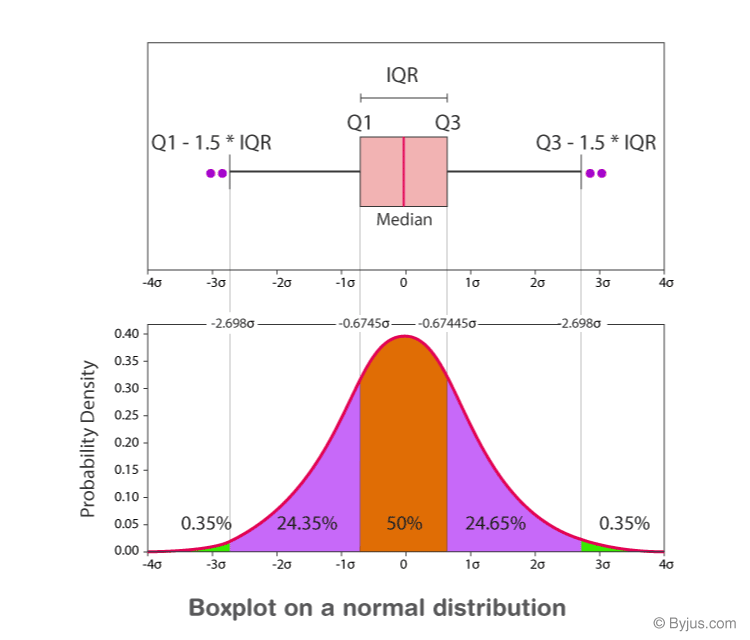

In [ ]:
sns.set_style("white")

# Crear una figura y ejes - nrows y ncols
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) # defino el lienzo

# Gráfico de barras para el promedio y la mediana del sueldo anual
sns.barplot(x=['Promedio', 'Mediana'], y=[68.88, 73], ax=axes[0, 0])
axes[0, 0].set_title('Sueldo Anual - Promedio vs. Mediana')
axes[0, 0].set_ylabel('Sueldo Anual (k$)')

# Diagrama de caja para el sueldo anual
sns.boxplot(y=clientes_seleccionados['Annual Income (k$)'], ax=axes[0, 1])
axes[0, 1].set_title('Distribución del Sueldo Anual')
axes[0, 1].set_ylabel('Sueldo Anual (k$)')

# Gráfico de barras para el promedio y la mediana del puntaje de gastos
sns.barplot(x=['Promedio', 'Mediana'], y=[59.05, 68.5], ax=axes[1, 0])
axes[1, 0].set_title('Puntaje de Gastos - Promedio vs. Mediana')
axes[1, 0].set_ylabel('Puntaje de Gastos')

# Diagrama de caja para el puntaje de gastos
sns.boxplot(y=clientes_seleccionados['Spending Score (1-100)'], ax=axes[1, 1])
axes[1, 1].set_title('Distribución del Puntaje de Gastos')
axes[1, 1].set_ylabel('Puntaje de Gastos')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

**_Compara estos valores con aquellos de los clientes en general._**

In [ ]:
# Datos de los clientes en general - redefinimos las variables
sueldo_anual_general = df['Annual Income (k$)'].dropna()
puntaje_gastos_general = df['Spending Score (1-100)'].dropna()

# Datos de los clientes seleccionados - renombramos
sueldo_anual_seleccionados = clientes_seleccionados['Annual Income (k$)'].dropna()
puntaje_gastos_seleccionados = clientes_seleccionados['Spending Score (1-100)'].dropna()

# Creamos el gráfico de boxplot
plt.figure(figsize=(12, 6))

# Boxplot para los clientes en general
plt.subplot(1, 2, 1) # fila - columna - index
plt.boxplot([sueldo_anual_general, puntaje_gastos_general], labels=['Sueldo Anual', 'Puntaje de Gastos'])
plt.title('Clientes en General')
plt.ylabel('Valor')

# Boxplot para los clientes seleccionados
plt.subplot(1, 2, 2)
plt.boxplot([sueldo_anual_seleccionados, puntaje_gastos_seleccionados], labels=['Sueldo Anual', 'Puntaje de Gastos'])
plt.title('Clientes Seleccionados')
plt.ylabel('Valor')

# Ajustamos el diseño y mostramos los gráficos
plt.tight_layout()
plt.show()


In [ ]:
# Estadísticas resumidas para los clientes seleccionados
stats_seleccionados = clientes_seleccionados[['Annual Income (k$)', 'Spending Score (1-100)']].describe()

# Estadísticas resumidas para los clientes en general
stats_general = df[['Annual Income (k$)', 'Spending Score (1-100)']].describe()

# Asignar etiquetas a las columnas de estadísticas
stats_seleccionados.columns = [f'Seleccionados_{col}' for col in stats_seleccionados.columns]
stats_general.columns = [f'General_{col}' for col in stats_general.columns]

# Comparación de estadísticas
comparacion = pd.concat([stats_seleccionados, stats_general], axis=1)

print(comparacion)

**_Obtiene la edad promedio de clientes que tienen un sueldo mayor al promedio._**

In [ ]:
# Paso 1: Calcular el sueldo promedio de todos los clientes
sueldo_promedio_general = df['Annual Income (k$)'].mean()

# Paso 2: Filtrar los clientes cuyo sueldo sea mayor que el promedio
clientes_sueldo_superior_promedio = df[df['Annual Income (k$)'] > sueldo_promedio_general]

# Paso 3: Calcular la edad promedio de los clientes filtrados
edad_promedio_sueldo_superior_promedio = clientes_sueldo_superior_promedio['Age'].mean()

print("La edad promedio de los clientes que tienen un sueldo mayor al promedio es:", edad_promedio_sueldo_superior_promedio)


**_Compara estos valores con aquellos de los clientes en general._**

🤔 &nbsp; **_¿Qué otras preguntas te surgen para analizar en este dataset?_**

#### 6.VISUALIZA LOS DATOS

**_Visualiza la distribución de las variables de sueldo promedio y puntaje de gastos. Haz gráficos que superpongan la distribución de cada una de estas variables de manera global como también sólo para los clientes seleccionados._**

In [ ]:
sns.set(style="whitegrid")

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Histograma para el sueldo promedio de todos los clientes
sns.histplot(df['Annual Income (k$)'], ax=axes[0], kde=True, color='skyblue', label='Clientes en General')

# Histograma para el sueldo promedio de los clientes seleccionados
sns.histplot(clientes_seleccionados['Annual Income (k$)'], ax=axes[0], kde=True, color='salmon', label='Clientes Seleccionados')

# Añadir título y etiquetas al primer subplot
axes[0].set_title('Distribución de Sueldo Promedio')
axes[0].set_xlabel('Sueldo Promedio (k$)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# Histograma para el puntaje de gastos de todos los clientes
sns.histplot(df['Spending Score (1-100)'], ax=axes[1], kde=True, color='skyblue', label='Clientes en General')

# Histograma para el puntaje de gastos de los clientes seleccionados
sns.histplot(clientes_seleccionados['Spending Score (1-100)'], ax=axes[1], kde=True, color='salmon', label='Clientes Seleccionados')

# Añadir título y etiquetas al segundo subplot
axes[1].set_title('Distribución de Puntaje de Gastos')
axes[1].set_xlabel('Puntaje de Gastos')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

**_Agrupa los datos por la variable `Genre` para ambos casos. Gráfica el ingreso promedio y su dispersion. Grafica, luego, el ingreso mediano y su rango intercuartil._**

In [ ]:
# Agrupar los datos por la variable "Genre" y calcular el ingreso promedio y mediano para cada grupo
grupo_genre = df.groupby('Genre')['Annual Income (k$)']
ingreso_promedio = grupo_genre.mean()
ingreso_mediano = grupo_genre.median()

# Graficar el ingreso promedio con su dispersión
plt.figure(figsize=(10, 6))
sns.barplot(x=ingreso_promedio.index, y=ingreso_promedio.values, ci='sd', palette='coolwarm')
plt.errorbar(x=ingreso_promedio.index, y=ingreso_promedio.values, yerr=grupo_genre.std(), fmt='none', c='black', capsize=5)
plt.title('Ingreso Promedio por Género con Dispersión')
plt.xlabel('Género')
plt.ylabel('Ingreso Promedio (k$)')
plt.show()

# Graficar el ingreso mediano con su rango intercuartil
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Annual Income (k$)', data=df, palette='coolwarm')
plt.title('Ingreso Mediano por Género con Rango Intercuartil')
plt.xlabel('Género')
plt.ylabel('Ingreso Mediano (k$)')
plt.show()


🤔 &nbsp; **_¿Existe una correlación entre el sueldo anual y el puntaje de gastos en los clientes seleccionados? ¿Y en todos los clientes en general?_**

In [ ]:
# Graficar el sueldo anual vs el puntaje de gastos con una línea de regresión lineal
sns.regplot(data=clientes_seleccionados, x='Annual Income (k$)', y='Spending Score (1-100)', scatter_kws={'alpha':0.5})
plt.title('Correlación entre Sueldo Anual y Puntaje de Gastos (Clientes Seleccionados)')
plt.xlabel('Sueldo Anual (k$)')
plt.ylabel('Puntaje de Gastos (1-100)')
plt.show()


In [ ]:
sns.regplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', scatter_kws={'alpha':0.5})
plt.title('Correlación entre Sueldo Anual y Puntaje de Gastos (Clientes Seleccionados)')
plt.xlabel('Sueldo Anual (k$)')
plt.ylabel('Puntaje de Gastos (1-100)')
plt.show()

Si la línea de regresión es ascendente (hacia arriba), indica una correlación positiva, mientras que si es descendente (hacia abajo), indica una correlación negativa.

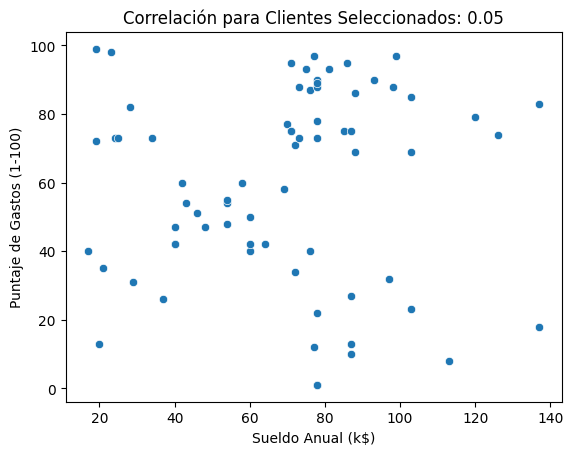

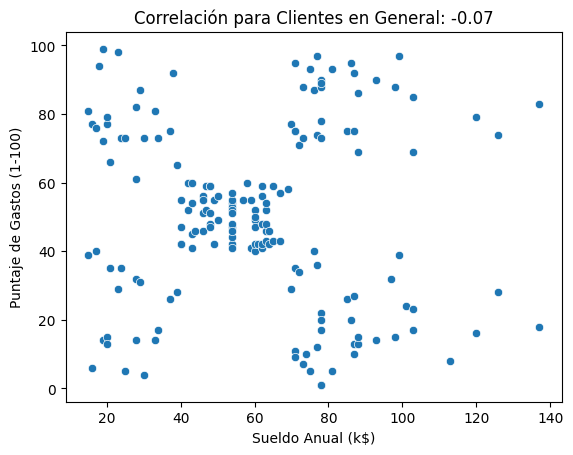

In [ ]:
# Calculamos la correlación para los clientes seleccionados
correlacion_seleccionados = clientes_seleccionados[['Annual Income (k$)', 'Spending Score (1-100)']].corr().iloc[0, 1]

# Calculamos la correlación para todos los clientes en general
correlacion_general = df[['Annual Income (k$)', 'Spending Score (1-100)']].corr().iloc[0, 1]

# Visualizamos la correlación para los clientes seleccionados
sns.scatterplot(data=clientes_seleccionados, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title(f'Correlación para Clientes Seleccionados: {correlacion_seleccionados:.2f}')
plt.xlabel('Sueldo Anual (k$)')
plt.ylabel('Puntaje de Gastos (1-100)')
plt.show()

# Visualizamos la correlación para todos los clientes en general
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title(f'Correlación para Clientes en General: {correlacion_general:.2f}')
plt.xlabel('Sueldo Anual (k$)')
plt.ylabel('Puntaje de Gastos (1-100)')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              200 non-null    int64  
 1   CustomerID              189 non-null    float64
 2   Genre                   186 non-null    object 
 3   Age                     189 non-null    float64
 4   Annual Income (k$)      185 non-null    float64
 5   Spending Score (1-100)  186 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


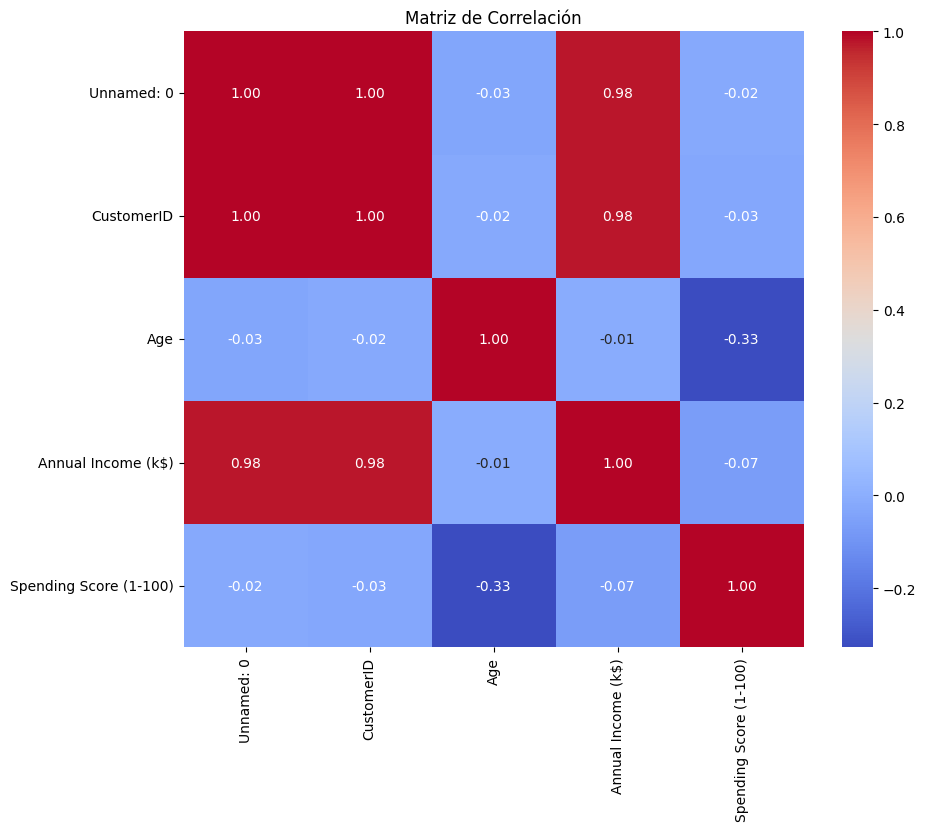

In [ ]:
matriz_correlacion = df.select_dtypes(include=[np.number]).corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [ ]:

matriz_correlacion = df.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


ValueError: could not convert string to float: 'Male'

In [ ]:
# Gráfico de pares para todas las variables numéricas
sns.pairplot(df)
plt.show()


In [ ]:
# Correlación de Kendall
correlacion_kendall = df.corr(method='kendall')

# Correlación de Spearman
correlacion_spearman = df.corr(method='spearman')


**_Visualiza otros datos que creas relevantes para este analisis._**

#### 💾 &nbsp; GUARDANDO EL ARCHIVO PARA LOS SIGUIENTES PASOS

Los siguientes pasos que vamos a tomar implican la transformación de los datos presentes en el dataset para un correcto ajuste de un modelo a elección. Para no tener que correr nuevamente todo el código, podemos guardar en un archivo `csv` el dataset tal cual lo tenemos ahora.

1) **Utiliza la función `.to_csv()` para guardar tu dataset**. Antes de hacerlo chequea la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).

In [ ]:
# Guardar el dataset como CSV
df.to_csv('nombre_archivo.csv', index=False)
